In this first part, we install import all the packages used

In [21]:
#Packages
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Subpackages
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


#ImportFunctions
from Functions import fetch_data
from Functions import moving_average
from Functions import rsi
from Functions import macd
from Functions import lagged_return
from Functions import bollinger_bands
from Functions import pe_ratio
from Functions import daily_returns






Next, we import some stock data

In [22]:
tickers = ["MMM", "AOS", "ABT", "ABBV", "ACN", "ADM", "ADBE", "ADP", "AES", "AFL", "A", "ABNB", "APD", "AKAM", "ALK", "ALB", "ARE", "ALGN", "ALLE", "LNT", "ALL", "GOOGL", "GOOG", "MO", "AMZN", "AMCR", "AMD", "AEE", "AAL", "AEP", "AXP", "AIG", "AMT", "AWK", "AMP", "AME", "AMGN", "APH", "ADI", "ANSS", "AON", "APA", "AAPL", "AMAT", "APTV", "ACGL", "ANET", "AJG", "AIZ", "T", "ATO", "ADSK", "AZO", "AVB", "AVY", "AXON", "BKR", "BALL", "BAC", "BBWI", "BAX", "BDX", "WRB", "BRK.B", "BBY", "BIO", "TECH", "BIIB", "BLK", "BX", "BK", "BA", "BKNG", "BWA", "BXP", 
"BSX", "BMY", "AVGO", "BR", "BRO", "BF.B", "BG", "CHRW", "CDNS", "CZR", "CPT", "CPB", "COF", "CAH", "KMX", "CCL", "CARR", "CTLT", "CAT", "CBOE", "CBRE", "CDW", "CE", "COR", "CNC", "CNP", "CDAY", "CF", "CRL", "SCHW", "CHTR", "CVX", "CMG", "CB", "CHD", "CI", "CINF", "CTAS", "CSCO", "C", "CFG", "CLX", "CME", "CMS", "KO", "CTSH", "CL", "CMCSA", "CMA", "CAG", "COP", "ED", "STZ", "CEG", "COO", "CPRT", "GLW", "CTVA", "CSGP", "COST", "CTRA", "CCI", "CSX", "CMI", "CVS", "DHI", "DHR", "DRI", "DVA", "DE", "DAL", "XRAY", "DVN", "DXCM", "FANG", "DLR", "DFS", "DIS", "DG", "DLTR", "D", "DPZ", "DOV", "DOW", "DTE", "DUK", "DD", "EMN", "ETN", "EBAY", "ECL", "EIX", "EW", "EA", "ELV", "LLY", "EMR", "ENPH", "ETR", "EOG", "EPAM", "EQT", "EFX", "EQIX", "EQR", "ESS", "EL", "ETSY", "EG", "EVRG", "ES", "EXC", "EXPE", "EXPD", "EXR", "XOM", "FFIV", "FDS", "FICO", "FAST", "FRT", "FDX", "FITB", "FSLR", "FE", "FIS", "FI", "FLT", "FMC", "F", "FTNT", "FTV", "FOXA", "FOX", "BEN", "FCX", "GRMN", "IT", "GEHC", "GEN", "GNRC", "GD", "GE", "GIS", "GM", "GPC", "GILD", "GL", "GPN", "GS", "HAL", "HIG", "HAS", "HCA", "PEAK", "HSIC", "HSY", "HES", "HPE", "HLT", "HOLX", "HD", "HON", "HRL", "HST", "HWM", "HPQ", "HUBB", "HUM", "HBAN", "HII", "IBM", "IEX", "IDXX", "ITW", "ILMN", "INCY", "IR", "PODD", "INTC", "ICE", "IFF", "IP", "IPG", "INTU", "ISRG", "IVZ", "INVH", "IQV", "IRM", "JBHT", "JKHY", "J", "JNJ", "JCI", "JPM", "JNPR", "K", "KVUE", "KDP", "KEY", "KEYS", "KMB", "KIM", "KMI", "KLAC", "KHC", "KR", "LHX", "LH", "LRCX", "LW", "LVS", "LDOS", "LEN", "LIN", "LYV", "LKQ", "LMT", "L", "LOW", "LULU", "LYB", "MTB", "MRO", "MPC", "MKTX", "MAR", "MMC", "MLM", "MAS", "MA", "MTCH", "MKC", "MCD", "MCK", "MDT", "MRK", "META", "MET", "MTD", "MGM", "MCHP", "MU", "MSFT", "MAA", "MRNA", "MHK", "MOH", "TAP", "MDLZ", "MPWR", "MNST", "MCO", "MS", "MOS", "MSI", "MSCI", "NDAQ", "NTAP", "NFLX", "NEM", "NWSA", "NWS", "NEE", "NKE", "NI", "NDSN", "NSC", "NTRS", "NOC", "NCLH", "NRG", "NUE", "NVDA", "NVR", "NXPI", "ORLY", "OXY", "ODFL", "OMC", "ON", "OKE", "ORCL", "OTIS", "PCAR", "PKG", "PANW", "PARA", "PH", "PAYX", "PAYC", "PYPL", "PNR", "PEP", "PFE", "PCG", "PM", "PSX", "PNW", "PXD", "PNC", "POOL", "PPG", "PPL", "PFG", "PG", "PGR", "PLD", "PRU", "PEG", "PTC", "PSA", "PHM", "QRVO", "PWR", "QCOM", "DGX", "RL", "RJF", "RTX", "O", "REG", "REGN", "RF", "RSG", "RMD", "RVTY", "RHI", "ROK", "ROL", "ROP", "ROST", "RCL", "SPGI", "CRM", "SBAC", "SLB", "STX", "SEE", "SRE", "NOW", "SHW", "SPG", "SWKS", "SJM", "SNA", "SEDG", "SO", "LUV", "SWK", "SBUX", "STT", "STLD", "STE", "SYK", "SYF", "SNPS", "SYY", "TMUS", "TROW", "TTWO", "TPR", "TRGP", "TGT", "TEL", "TDY", "TFX", "TER", "TSLA", "TXN", "TXT", "TMO", "TJX", "TSCO", "TT", "TDG", "TRV", "TRMB", "TFC", "TYL", "TSN", "USB", "UDR", "ULTA", "UNP", "UAL", "UPS", "URI", "UNH", "UHS", "VLO", "VTR", "VLTO", "VRSN", "VRSK", "VZ", "VRTX", "VFC", 
"VTRS", "VICI", "V", "VMC", "WAB", "WBA", "WMT", "WBD", "WM", "WAT", "WEC", "WFC", "WELL", "WST", "WDC", "WRK", "WY", "WHR", "WMB", "WTW", "GWW", "WYNN", "XEL", "XYL", "YUM", "ZBRA", "ZBH", "ZION", "ZTS"]

start_date = "2013-10-01"
end_date = "2023-10-01"

stock_data = fetch_data(tickers, start_date, end_date)

Now we calculate the technical indicators for each stock

In [23]:
# For each stock's data, compute the technical indicators and add them as new columns to the DataFrame

for ticker, data in stock_data.items():
    # Backup the 'Close' prices
    close_prices = data['Close'].copy()
    
    # 20-day Moving Average
    data['MA20'] = moving_average(data)
    
    # RSI
    data['RSI'] = rsi(data)
    
    # MACD
    data['MACD'], data['Signal_Line'] = macd(data)
    
    # 1, 2, and 3 Day Lagged Returns
    data['Lagged_Return_1'] = lagged_return(data, 1)
    data['Lagged_Return_2'] = lagged_return(data, 2)
    data['Lagged_Return_3'] = lagged_return(data, 3)
    
    # Bollinger Bands
    data['Upper_Bollinger'], data['Lower_Bollinger'] = bollinger_bands(data)
    
    # Restore 'Close' column
    data['Close'] = close_prices

    # Extract the 'Close' column
    close_prices = data['Close']
    
    # Calculate daily returns for all available days
    daily_returns = close_prices.pct_change().dropna()

    



Now that we have all the technical indicators for each stock we make a new dataframe that contains the data for all the stocks. We also do some data cleaning like removing the NANs.

In [24]:
# Dictionary to store the split data for each stock
all_stock_data = {}

for ticker, data in stock_data.items():
    data_clean = data.dropna()  # drop rows with NaN values

    # Features: using technical indicators and lagged returns
    X = data_clean[['RSI', 'MACD', 'Signal_Line', 'Lagged_Return_1', 'Lagged_Return_2', 'Lagged_Return_3', 'Upper_Bollinger', 'Lower_Bollinger']]

    # Target: Direction of the next day's return (1 for positive, 0 for negative or non-positive)
    y = (data_clean['Close'].pct_change().shift(-1) > 0).astype(int)

    # Splitting the data: 70% train, 15% validation, 15% test
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False)
    
    # Store the data splits in the dictionary
    all_stock_data[ticker] = {
        'X_train': X_train,
        'X_val': X_val,
        'X_test': X_test,
        'y_train': y_train,
        'y_val': y_val,
        'y_test': y_test
    }

# Now, `all_stock_data` contains the data splits for all stocks.

Now we actually make the classifier to predict the stock direction. We use a random forest model to determine this.

In [25]:
# Dictionary to store the trained models and their performances
models = {}
performances = {}

# List to store all validation accuracy scores
all_validation_accuracies = []

for ticker in all_stock_data:
    # Get data for the current stock
    X_train = all_stock_data[ticker]['X_train']
    y_train = all_stock_data[ticker]['y_train']
    X_val = all_stock_data[ticker]['X_val']
    y_val = all_stock_data[ticker]['y_val']

    # Initialize and train the Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Validate the model
    y_val_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    
    # Add the accuracy to the list
    all_validation_accuracies.append(accuracy)

    # Store the trained model and its performance
    models[ticker] = clf
    performances[ticker] = {
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_val, y_val_pred)
    }

    # Print out the performance for the current stock
    print(f"Performance for {ticker}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_val, y_val_pred))
    print("-------------------------------------------------")

# Calculate and print the average validation accuracy
average_validation_accuracy = sum(all_validation_accuracies) / len(all_validation_accuracies)
print(f"Average Validation Accuracy across all stocks: {average_validation_accuracy:.4f}")


Performance for AAPL:
Accuracy: 0.5323
              precision    recall  f1-score   support

           0       0.57      0.46      0.51        98
           1       0.50      0.61      0.55        88

    accuracy                           0.53       186
   macro avg       0.54      0.54      0.53       186
weighted avg       0.54      0.53      0.53       186

-------------------------------------------------
Performance for META:
Accuracy: 0.4946
              precision    recall  f1-score   support

           0       0.50      0.20      0.29        94
           1       0.49      0.79      0.61        92

    accuracy                           0.49       186
   macro avg       0.50      0.50      0.45       186
weighted avg       0.50      0.49      0.45       186

-------------------------------------------------
Average Validation Accuracy across all stocks: 0.5134


After we have trained the model on the validation set, we will now test on an out of sample test. In other words, we test on new data.

In [26]:
# Dictionary to store test set performances
test_performances = {}

# List to store all accuracy scores
all_accuracies = []

for ticker in all_stock_data:
    # Get the test data for the current stock
    X_test = all_stock_data[ticker]['X_test']
    y_test = all_stock_data[ticker]['y_test']

    # Predict using the trained model
    y_test_pred = models[ticker].predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store the performance on the test set
    test_performances[ticker] = {
        'Test Accuracy': test_accuracy,
        'Test Classification Report': classification_report(y_test, y_test_pred)
    }

    # Add the accuracy to the list
    all_accuracies.append(test_accuracy)

    # Print out the test performance for the current stock
    print(f"Test Performance for {ticker}:")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(classification_report(y_test, y_test_pred))
    print("-------------------------------------------------")

# Calculate and print the average accuracy
average_accuracy = sum(all_accuracies) / len(all_accuracies)
print(f"Average Test Accuracy across all stocks: {average_accuracy:.4f}")


Test Performance for AAPL:
Test Accuracy: 0.5323
              precision    recall  f1-score   support

           0       0.48      0.66      0.56        83
           1       0.61      0.43      0.50       103

    accuracy                           0.53       186
   macro avg       0.55      0.54      0.53       186
weighted avg       0.55      0.53      0.53       186

-------------------------------------------------
Test Performance for META:
Test Accuracy: 0.5054
              precision    recall  f1-score   support

           0       0.49      0.55      0.52        89
           1       0.53      0.46      0.49        97

    accuracy                           0.51       186
   macro avg       0.51      0.51      0.51       186
weighted avg       0.51      0.51      0.50       186

-------------------------------------------------
Average Test Accuracy across all stocks: 0.5188


Now that we have tested the model we want to see if we can improve the accuracy by tuning the hyperparameters. We basically run the same model as before, but this time we tune the model to find the best hyperparameters. We do this to see if we can improve the performance of the model.

In [27]:
# Dictionary to store the tuned models and their performances
tuned_models = {}
tuned_performances = {}

# Distributions for hyperparameters
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# List to store all validation accuracy scores
all_validation_accuracies = []

for ticker, stock_data in all_stock_data.items():
    # Get data for the current stock
    X_train = stock_data['X_train']
    y_train = stock_data['y_train']
    X_val = stock_data['X_val']
    y_val = stock_data['y_val']

    # Initialize RandomForest and RandomizedSearchCV
    clf = RandomForestClassifier(random_state=42)
    random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)

    # Check if RandomizedSearchCV found a best estimator
    if hasattr(random_search, 'best_estimator_'):
        best_clf = random_search.best_estimator_

        # Validate the model
        y_val_pred = best_clf.predict(X_val)
        accuracy = accuracy_score(y_val, y_val_pred)

        # Add the accuracy to the list
        all_validation_accuracies.append(accuracy)

        # Store the tuned model and its performance
        tuned_models[ticker] = best_clf
        tuned_performances[ticker] = {
            'Accuracy': accuracy,
            'Classification Report': classification_report(y_val, y_val_pred)
        }

        # Print out the tuned performance for the current stock
        print(f"Tuned Performance for {ticker}:")
        print(f"Accuracy: {accuracy:.4f}")
        print("-------------------------------------------------")
    else:
        print(f"RandomizedSearchCV did not complete successfully for {ticker}. Skipping this stock.")

# Calculate and print the average validation accuracy
average_validation_accuracy = sum(all_validation_accuracies) / len(all_validation_accuracies)
print(f"\nAverage Tuned Validation Accuracy across all stocks: {average_validation_accuracy:.4f}")


Tuned Performance for AAPL:
Accuracy: 0.4892
-------------------------------------------------


Now that we have tuned the model on the training and validation data, we want to see how well it performs on an out of sample dataset. We use the tuned models on test data:

In [ ]:
# Dictionary to store test set performances for the tuned models
tuned_test_performances = {}

# List to store all test accuracy scores for the tuned models
all_tuned_test_accuracies = []

for ticker, stock_data in all_stock_data.items():
    # Get the test data for the current stock
    X_test = stock_data['X_test']
    y_test = stock_data['y_test']

    # Predict using the tuned model
    y_test_pred = tuned_models[ticker].predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Add the test accuracy to the list
    all_tuned_test_accuracies.append(test_accuracy)

    # Store the performance on the test set for the tuned model
    tuned_test_performances[ticker] = {
        'Test Accuracy': test_accuracy,
        'Test Classification Report': classification_report(y_test, y_test_pred)
    }

    # Print out the test performance for the current stock
    print(f"Tuned Test Performance for {ticker}:")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(classification_report(y_test, y_test_pred))
    print("-------------------------------------------------")

# Calculate and print the average test accuracy for the tuned models
average_tuned_test_accuracy = sum(all_tuned_test_accuracies) / len(all_tuned_test_accuracies)
print(f"\nAverage Tuned Test Accuracy across all stocks: {average_tuned_test_accuracy:.4f}")


Tuned Test Performance for AAPL:
Test Accuracy: 0.4827
              precision    recall  f1-score   support

           0       0.45      0.25      0.32       183
           1       0.50      0.71      0.58       192

    accuracy                           0.48       375
   macro avg       0.47      0.48      0.45       375
weighted avg       0.47      0.48      0.45       375

-------------------------------------------------
Tuned Test Performance for META:
Test Accuracy: 0.5147
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       186
           1       0.52      0.52      0.52       189

    accuracy                           0.51       375
   macro avg       0.51      0.51      0.51       375
weighted avg       0.51      0.51      0.51       375

-------------------------------------------------

Average Tuned Test Accuracy across all stocks: 0.4987


Now that we have done the gridsearch we can evaluate the two models based on their accuracy. We make a table of the results from the validation test and the test data. 

In [ ]:
# Extract average accuracies for non-tuned model
non_tuned_validation_accuracy = sum([perf['Accuracy'] for perf in performances.values()]) / len(performances)
non_tuned_test_accuracy = sum([perf['Test Accuracy'] for perf in test_performances.values()]) / len(test_performances)

# Extract average accuracies for tuned model
tuned_validation_accuracy = sum([perf['Accuracy'] for perf in tuned_performances.values()]) / len(tuned_performances)
tuned_test_accuracy = sum([perf['Test Accuracy'] for perf in tuned_test_performances.values()]) / len(tuned_test_performances)

# Create a DataFrame
results = pd.DataFrame({
    'Model': ['Non-Tuned', 'Tuned'],
    'Validation Accuracy': [non_tuned_validation_accuracy, tuned_validation_accuracy],
    'Test Accuracy': [non_tuned_test_accuracy, tuned_test_accuracy]
})

# Display the results
print(results)


       Model  Validation Accuracy  Test Accuracy
0  Non-Tuned             0.498667       0.500000
1      Tuned             0.496000       0.498667


Now we start backtesting the models. We make a list that includes the predicted return and the actual return.

In [ ]:
ReturnsAndPredictionStocks = {}
ReturnsAndPredictionsValueNontuned = []
ReturnsAndPredictionsValueTuned = []
Daily_return_Value = []
Date = []

for ticker, stock_data in all_stock_data.items():
    
    # Get the test data for the current stock
    X_test = stock_data['X_test']
    y_test = stock_data['y_test']
    Returndata = data['Close']

    # Calculate the daily returns
    daily_returns = Returndata.pct_change()
    
    # Drop the first NaN value (since there is no return for the first day)
    daily_returns = daily_returns.dropna()


    # Predict using the two models
    y_test_pred_tuned = tuned_models[ticker].predict(X_test)
    y_test_pred_nontuned = models[ticker].predict(X_test)

    # Add the daily returns to a list
    Daily_return_Value.append(daily_returns.tolist())
    
    # Add the results to a list and adding date
    ReturnsAndPredictionsValueNontuned.append(y_test_pred_nontuned)
    ReturnsAndPredictionsValueTuned.append(y_test_pred_tuned)

    # Store the prediction and test for the model
    ReturnsAndPredictionStocks[ticker] = {
        'daily return': daily_returns,
        'prediction for nontuned model': y_test_pred_nontuned,
        'prediction for tuned model': y_test_pred_tuned
    }


In [ ]:
for ticker, stock_data in all_stock_data.items():
    
    # Create an empty DataFrame for each stock
    df = pd.DataFrame(columns=['Date', 'daily return', 'Nontuned model', 'Tuned model'])

    # Get the test data for the current stock
    X_test = stock_data['X_test']
    y_test = stock_data['y_test']
    Returndata = data['Close']

    # Calculate the daily returns for the current stock
    daily_returns = Returndata.pct_change()
    
    # Align daily_returns with X_test and y_test
    daily_returns = daily_returns.loc[X_test.index]

    # Predict using the two models
    y_test_pred_tuned = tuned_models[ticker].predict(X_test)
    y_test_pred_nontuned = models[ticker].predict(X_test)

    # Create a DataFrame for the current stock
    ResultsReturnAndPrediction = pd.DataFrame({
        'Date': X_test.index,
        'daily return': daily_returns.tolist(),
        'Nontuned model': y_test_pred_nontuned.tolist(),
        'Tuned model': y_test_pred_tuned.tolist()
    })

    # Append the stock DataFrame to the main DataFrame
    df = pd.concat([df, ResultsReturnAndPrediction], ignore_index=True)

    # Drop rows with NaN values in any column
    df = df.dropna()

    # Print the resulting DataFrame for each stock
    print(f"Data for {ticker}:")
    print(df)


Data for AAPL:
          Date  daily return Nontuned model Tuned model
0   2022-04-04      0.040205              0           1
1   2022-04-05     -0.008765              0           1
2   2022-04-06     -0.036836              1           0
3   2022-04-07     -0.001567              1           1
4   2022-04-08     -0.002781              0           0
..         ...           ...            ...         ...
370 2023-09-25      0.005851              1           1
371 2023-09-26     -0.006216              0           1
372 2023-09-27     -0.004081              0           0
373 2023-09-28      0.020891              1           1
374 2023-09-29     -0.012337              1           1

[375 rows x 4 columns]
Data for META:
          Date  daily return Nontuned model Tuned model
0   2022-04-04      0.040205              0           0
1   2022-04-05     -0.008765              0           0
2   2022-04-06     -0.036836              1           1
3   2022-04-07     -0.001567              1       

We perform the backtest and plot the results

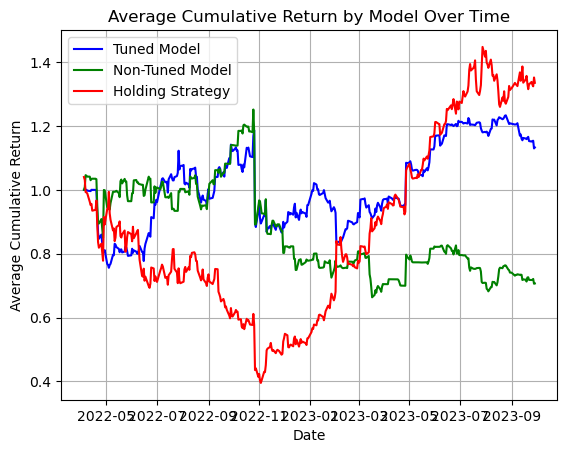

In [ ]:
# DataFrames to store cumulative returns time series for all stocks
df_cumulative_returns_tuned = pd.DataFrame(index=X_test.index)  
df_cumulative_returns_nontuned = pd.DataFrame(index=X_test.index)
df_daily_returns_all_stocks = pd.DataFrame(index=X_test.index)  # DataFrame to store daily returns for all stocks

for ticker, stock_data in all_stock_data.items():
    
    # Extract the test data and the returns data
    X_test = stock_data['X_test']
    y_test = stock_data['y_test']
    Returndata = data['Close']
    daily_returns = Returndata.pct_change().loc[X_test.index]
    df_daily_returns_all_stocks[ticker] = daily_returns  # Store daily returns for each stock

    # Predict using the two models and shift the predictions by one day
    y_test_pred_tuned = pd.Series(tuned_models[ticker].predict(X_test).flatten(), index=X_test.index).shift(1).fillna(0)
    y_test_pred_nontuned = pd.Series(models[ticker].predict(X_test).flatten(), index=X_test.index).shift(1).fillna(0)
    
    # Calculate strategy daily returns
    strategy_returns_tuned = daily_returns * (2 * y_test_pred_tuned - 1)
    strategy_returns_nontuned = daily_returns * (2 * y_test_pred_nontuned - 1)

    # Set the first value of strategy returns to 0 to ensure cumulative product starts at 1
    strategy_returns_tuned.iloc[0] = 0
    strategy_returns_nontuned.iloc[0] = 0

    # Calculate cumulative returns time series
    df_cumulative_returns_tuned[ticker] = (1 + strategy_returns_tuned).cumprod()
    df_cumulative_returns_nontuned[ticker] = (1 + strategy_returns_nontuned).cumprod()

# Calculate average daily returns across all stocks
average_daily_returns = df_daily_returns_all_stocks.mean(axis=1)

# Calculate cumulative returns for holding strategy
cumulative_returns_holding = (1 + average_daily_returns).cumprod()

# Calculate average cumulative returns for each date
avg_cumulative_returns_tuned = df_cumulative_returns_tuned.mean(axis=1)
avg_cumulative_returns_nontuned = df_cumulative_returns_nontuned.mean(axis=1)

# Plotting the results
plt.plot(avg_cumulative_returns_tuned, label='Tuned Model', color='blue')
plt.plot(avg_cumulative_returns_nontuned, label='Non-Tuned Model', color='green')
plt.plot(cumulative_returns_holding, label='Holding Strategy', color='red')  # Add this line
plt.xlabel('Date')
plt.ylabel('Average Cumulative Return')
plt.title('Average Cumulative Return by Model Over Time')
plt.legend()
plt.grid(True)
plt.show()


Now we calculate the sharpe ratios from the 3 strategies

In [ ]:
# Calculate daily returns for each strategy
daily_returns_tuned = df_cumulative_returns_tuned.pct_change().mean(axis=1)
daily_returns_nontuned = df_cumulative_returns_nontuned.pct_change().mean(axis=1)

# 1. Calculate the mean daily return for each strategy
mean_return_tuned = daily_returns_tuned.mean()
mean_return_nontuned = daily_returns_nontuned.mean()
mean_return_holding = average_daily_returns.mean()

# 2. Calculate the standard deviation of daily returns for each strategy
std_dev_tuned = daily_returns_tuned.std()
std_dev_nontuned = daily_returns_nontuned.std()
std_dev_holding = average_daily_returns.std()

# 3. Compute the Sharpe ratio for each strategy (assuming risk-free rate is 0)
sharpe_ratio_tuned = mean_return_tuned / std_dev_tuned
sharpe_ratio_nontuned = mean_return_nontuned / std_dev_nontuned
sharpe_ratio_holding = mean_return_holding / std_dev_holding

print(f"Sharpe Ratio (Tuned Model): {sharpe_ratio_tuned:.4f}")
print(f"Sharpe Ratio (Non-Tuned Model): {sharpe_ratio_nontuned:.4f}")
print(f"Sharpe Ratio (Holding Strategy): {sharpe_ratio_holding:.4f}")


Sharpe Ratio (Tuned Model): 0.0367
Sharpe Ratio (Non-Tuned Model): -0.0131
Sharpe Ratio (Holding Strategy): 0.0396


Next part of the code will focus more on evaluating the machine learning models. Here we check what kind of parameters the model uses and how well it guesses the direction of the stocks. 

<Figure size 1200x800 with 0 Axes>

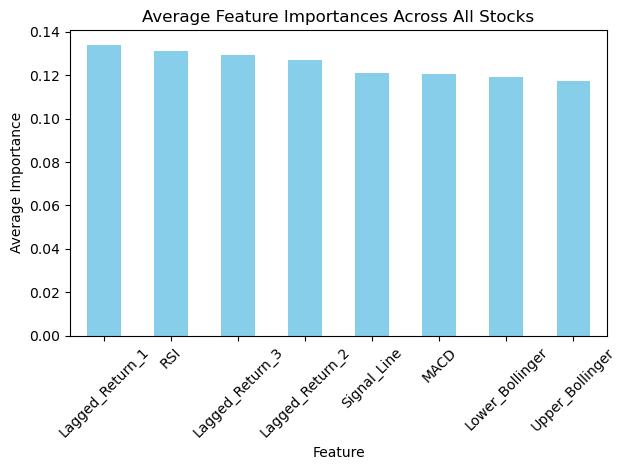

In [ ]:
# Initialize a zero-filled array with the same shape as feature_importances to store cumulative importances
cumulative_importances = np.zeros_like(models[list(models.keys())[0]].feature_importances_)

# Loop through each stock ticker in the models dictionary
for ticker, clf in models.items():

    # Add the feature importances to the cumulative_importances array
    cumulative_importances += clf.feature_importances_

# Calculate the average feature importances
average_importances = cumulative_importances / len(models)

# Get the names of the features from the training data for any stock (since they share the same features)
feature_names = all_stock_data[list(all_stock_data.keys())[0]]['X_train'].columns

# Create a DataFrame to hold the feature names and their average importances
df_average_importances = pd.DataFrame({
    'Feature': feature_names,
    'Average Importance': average_importances
})

# Sort the DataFrame by average importance in descending order
df_average_importances = df_average_importances.sort_values(by='Average Importance', ascending=False)

# Plot the average feature importances
plt.figure(figsize=(12, 8))
df_average_importances.plot(kind='bar', x='Feature', y='Average Importance', legend=False, color='skyblue')
plt.title(f'Average Feature Importances Across All Stocks')
plt.ylabel('Average Importance')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In the plot above we have the most important features of the simple nontuned model.

<Figure size 1200x800 with 0 Axes>

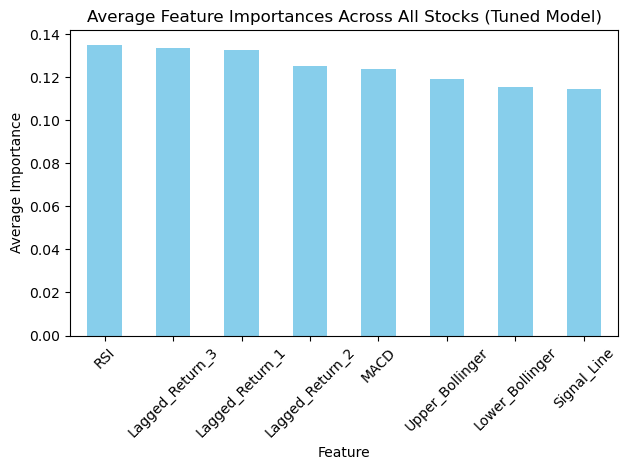

In [ ]:
# Initialize a zero-filled array with the same shape as feature_importances to store cumulative importances
cumulative_importances = np.zeros_like(tuned_models[list(tuned_models.keys())[0]].feature_importances_)

# Loop through each stock ticker in the tuned_models dictionary
for ticker, best_clf in tuned_models.items():

    # Add the feature importances to the cumulative_importances array
    cumulative_importances += best_clf.feature_importances_

# Calculate the average feature importances
average_importances = cumulative_importances / len(tuned_models)

# Get the names of the features from the training data for any stock (since they share the same features)
feature_names = all_stock_data[list(all_stock_data.keys())[0]]['X_train'].columns

# Create a DataFrame to hold the feature names and their average importances
df_average_importances = pd.DataFrame({
    'Feature': feature_names,
    'Average Importance': average_importances
})

# Sort the DataFrame by average importance in descending order
df_average_importances = df_average_importances.sort_values(by='Average Importance', ascending=False)

# Plot the average feature importances
plt.figure(figsize=(12, 8))
df_average_importances.plot(kind='bar', x='Feature', y='Average Importance', legend=False, color='skyblue')
plt.title(f'Average Feature Importances Across All Stocks (Tuned Model)')
plt.ylabel('Average Importance')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Here we have the same plot for the tuned model. Next we try to make the confusing matrices for the models:

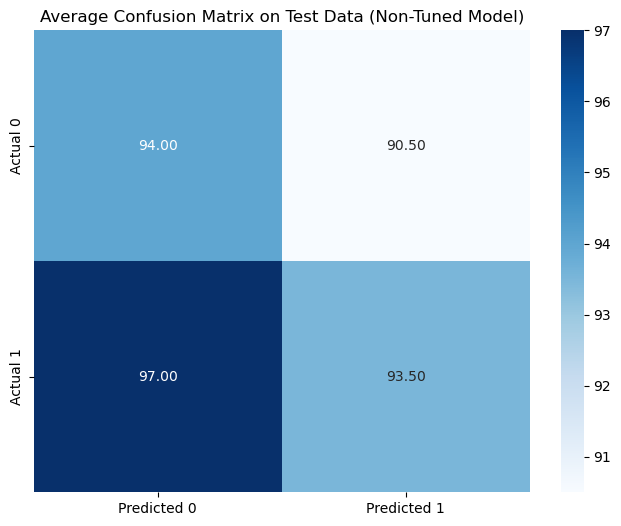

In [ ]:

# Initialize a cumulative confusion matrix with zeros
cumulative_cm = np.zeros((2, 2))

# Loop through each stock ticker in the models dictionary
for ticker, clf in models.items():
    X_test = all_stock_data[ticker]['X_test']
    y_test = all_stock_data[ticker]['y_test']
    
    # Get predictions on the test set
    y_test_pred = clf.predict(X_test)
    
    # Add the confusion matrix for the current stock to the cumulative matrix
    cumulative_cm += confusion_matrix(y_test, y_test_pred)

# Calculate the average confusion matrix
average_cm = cumulative_cm / len(models)

# Plot the average confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Average Confusion Matrix on Test Data (Non-Tuned Model)")
plt.show()


We test how many times the model actually gets the correct answer and how many times it is wrong. Now we do the same thing for the tuned model:

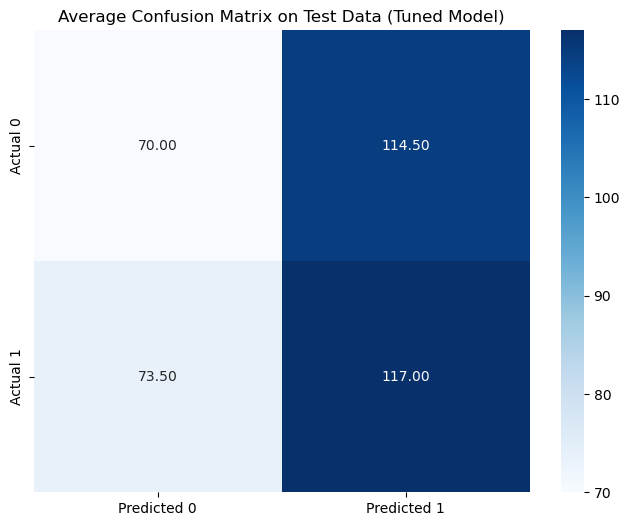

In [ ]:
# Initialize a cumulative confusion matrix with zeros
cumulative_cm = np.zeros((2, 2))

# Loop through each stock ticker in the tuned_models dictionary
for ticker, best_clf in tuned_models.items():
    X_test = all_stock_data[ticker]['X_test']
    y_test = all_stock_data[ticker]['y_test']
    
    # Get predictions on the test set
    y_test_pred = best_clf.predict(X_test)
    
    # Add the confusion matrix for the current stock to the cumulative matrix
    cumulative_cm += confusion_matrix(y_test, y_test_pred)

# Calculate the average confusion matrix
average_cm = cumulative_cm / len(tuned_models)

# Plot the average confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Average Confusion Matrix on Test Data (Tuned Model)")
plt.show()


We make a heatmap for the effects of the hyperparameters on accuracy

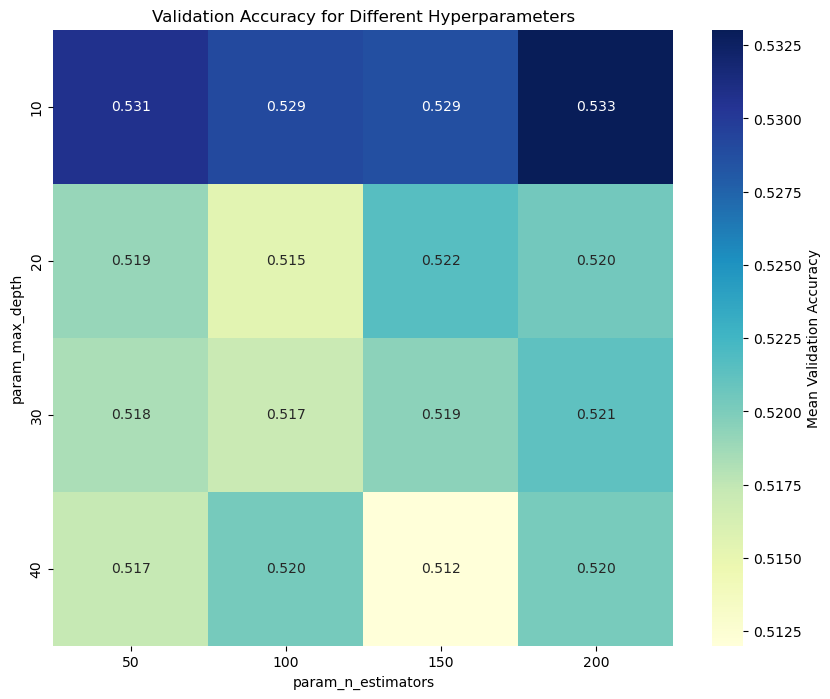

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(random_search.cv_results_)

# Filter the DataFrame for the relevant columns using pivot_table
heatmap_data = results_df.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={'label': 'Mean Validation Accuracy'})
plt.title("Validation Accuracy for Different Hyperparameters")
plt.show()


ROCAUC comes downunder

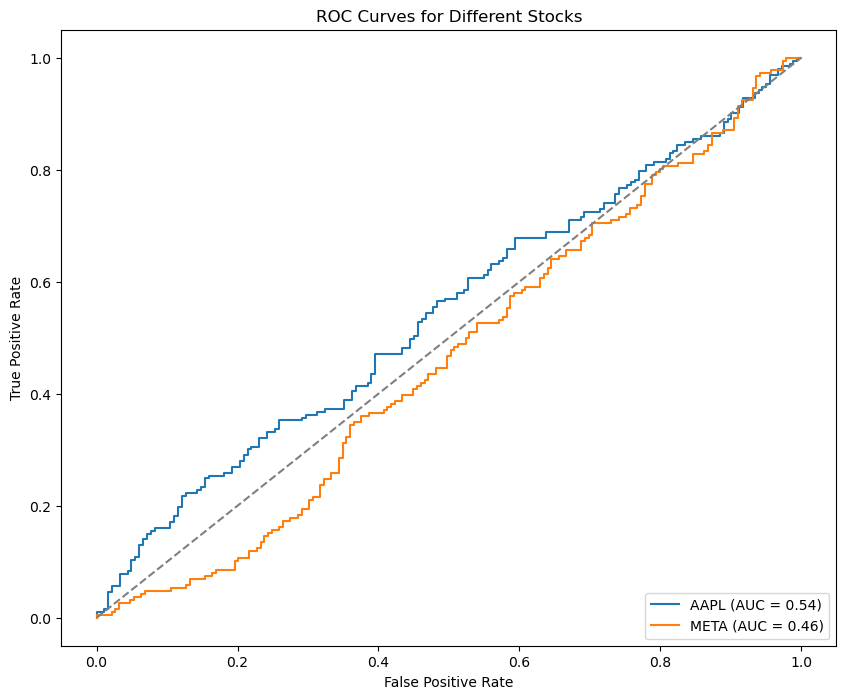

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Iterate over each stock's data
for ticker, stock_data in all_stock_data.items():
    X_val = stock_data['X_val']
    y_val = stock_data['y_val']
    
    # If the stock is in tuned_models (i.e., RandomizedSearchCV found a best estimator for it)
    if ticker in tuned_models:
        # Get the probability scores for the positive class
        y_val_prob = tuned_models[ticker].predict_proba(X_val)[:, 1]
        
        # Compute the ROC curve
        fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
        
        # Compute the AUC
        roc_auc = auc(fpr, tpr)
        
        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'{ticker} (AUC = {roc_auc:.2f})')

# Plot the random classifier (diagonal)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Stocks')
plt.legend(loc='lower right')
plt.show()


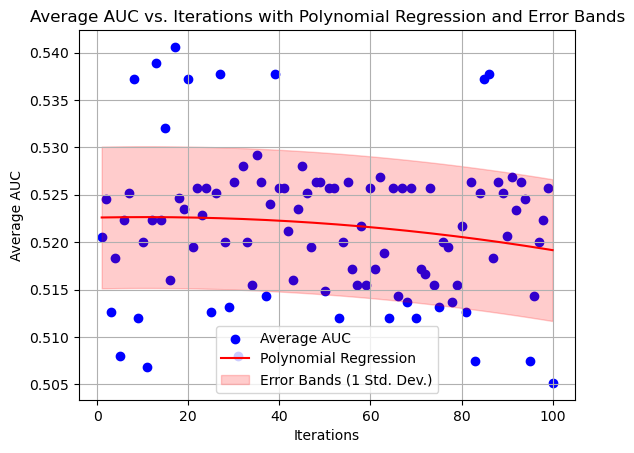

In [ ]:
import numpy as np
from numpy.polynomial import Polynomial

# Extract the mean test scores (mean AUC values) from RandomizedSearchCV results
average_aucs = np.array(random_search.cv_results_['mean_test_score'])
iterations = np.array(range(1, len(average_aucs) + 1))

# Fit a 2nd degree polynomial to the average AUC values
p = Polynomial.fit(iterations, average_aucs, 2)
x_fit = np.linspace(iterations.min(), iterations.max(), 500)
y_fit = p(x_fit)

# Compute residuals and standard deviation
residuals = average_aucs - p(iterations)
std_error = np.std(residuals)

# Plotting
plt.scatter(iterations, average_aucs, color='blue', label='Average AUC')
plt.plot(x_fit, y_fit, color='red', label='Polynomial Regression')
plt.fill_between(x_fit, y_fit - std_error, y_fit + std_error, color='red', alpha=0.2, label='Error Bands (1 Std. Dev.)')

# Customize the plot
plt.xlabel('Iterations')
plt.ylabel('Average AUC')
plt.title('Average AUC vs. Iterations with Polynomial Regression and Error Bands')
plt.legend()
plt.grid(True)
plt.show()


Ovenstående plot viser hvor meget præcisionen øges når man øger antallet af iterationer i vores random gridsearch. Det hjælper ikke meget mere for præcisionen, så det giver ikke meget mening at øge det. Det ligner at den konvergerer mod det der punkt. 